# SI 618 - Homework #3: Data Visualization

Version 2022.01.30.1.CT

## Background

This homework assignment focuses on the visual analysis of the COVID-19 data avaiable here: https://covid19datahub.io/articles/api/python.html. A description of the dataset can be found at https://covid19datahub.io/articles/doc/data.html

Your main task in this assignment is to explore the data *using the data manipulation, analysis, and visualization methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas, matplotlib and seaborn documentation, as well as Stack Overflow, or other online resources.  

## Total Points and Rubric

Each question is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

In [775]:
MY_UNIQNAME = 'yjwoo' # please fill in your uniqname

## Getting the data


The following cell should install the most up-to-date version of the 
COVID-19 datahub.  Alternatively, you can consult the datahub documentation to download the data files directly.

In [715]:
pip install --upgrade covid19dh

Note: you may need to restart the kernel to use updated packages.


### Restart the kernel to import the module and access the data

In [716]:
from covid19dh import covid19

## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [717]:
# Load all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import datestr2num

In [718]:
import warnings
warnings.filterwarnings('ignore')

### <font color='#8B0000'> Q1 How many different countries are represented in the country-level data set?</font>
- Refer to the documentation to call the covid19() function with appropriate parameters (https://covid19datahub.io/articles/api/python.html)

In [719]:
df_covid_country_level, src = covid19(level = 1) 
df_covid_country_level.head()

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
87758,0094b645,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
87759,0094b645,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
87760,0094b645,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
87761,0094b645,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
87762,0094b645,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA


In [720]:
df_covid_country_level.shape

(167987, 47)

There is a total of 168,987 rows and 47 columns in the country-level data set.

In [721]:
len(df_covid_country_level["administrative_area_level_1"].unique())

236

We can check that there is a total of 236 countries in the country-level data set. It can be seen that almost all countries are included in the data.

In [722]:
df_covid_country_level.groupby(["administrative_area_level_1"]).nunique().date.sort_values()

administrative_area_level_1
Grand Princess      10
Niue                43
Costa Atlantica     81
Pitcairn            85
Tokelau            114
                  ... 
United Kingdom     758
Argentina          766
Thailand           766
China              767
Mexico             768
Name: date, Length: 236, dtype: int64

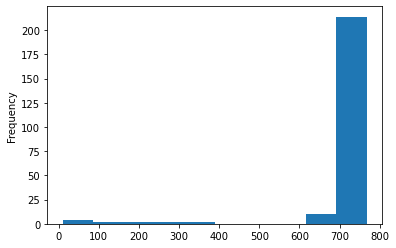

In [723]:
df_covid_country_level.groupby(["administrative_area_level_1"]).nunique().date.sort_values().plot.hist(bins = 10)
plt.show()

Most countries have more than 600 days of data, but some like Grand Princess, Niue, Costa Atlantica have less than 100 days of data.

### <font color='#8B0000'> Q2 Create a line chart that shows the total number of cases over time.</font>

In [724]:
df_confirmed_case = df_covid_country_level[["date", "confirmed", "administrative_area_level_1"]].sort_values(["administrative_area_level_1", "date"]).rename(columns = {"confirmed" : "cum_confirmed", "administrative_area_level_1" : "country"})

In [725]:
df_confirmed_case["daily_confirmed"] = df_confirmed_case.groupby("country").cum_confirmed.diff().fillna(df_confirmed_case['cum_confirmed'])
df_confirmed_case = df_confirmed_case[["date", "country", "daily_confirmed", "cum_confirmed"]]

In [726]:
df_confirmed_case['year_month'] = df_confirmed_case['date'].dt.strftime('%Y-%m')

In [727]:
df_confirmed_case_monthly = df_confirmed_case[df_confirmed_case.daily_confirmed > 0].groupby("year_month").daily_confirmed.sum() \
                                .cumsum().reset_index().rename({"daily_confirmed" : "cum_confirmed"}, axis = 1) \
                                .merge(df_confirmed_case[df_confirmed_case.daily_confirmed > 0].groupby("year_month").daily_confirmed.sum(), on = "year_month", how = "left") \
                                .rename(columns = {"daily_confirmed" : "monthly_confirmed"})[["year_month", "monthly_confirmed", "cum_confirmed"]]
df_confirmed_case_monthly

,year_month,monthly_confirmed,cum_confirmed
0,2020-01,9863.0,9863.0
1,2020-02,76682.0,86545.0
2,2020-03,794611.0,881156.0
3,2020-04,2365557.0,3246713.0
4,2020-05,2901122.0,6147835.0
5,2020-06,4325821.0,10473656.0
6,2020-07,7163395.0,17637051.0
7,2020-08,7945496.0,25582547.0
8,2020-09,8590723.0,34173270.0
9,2020-10,12270240.0,46443510.0


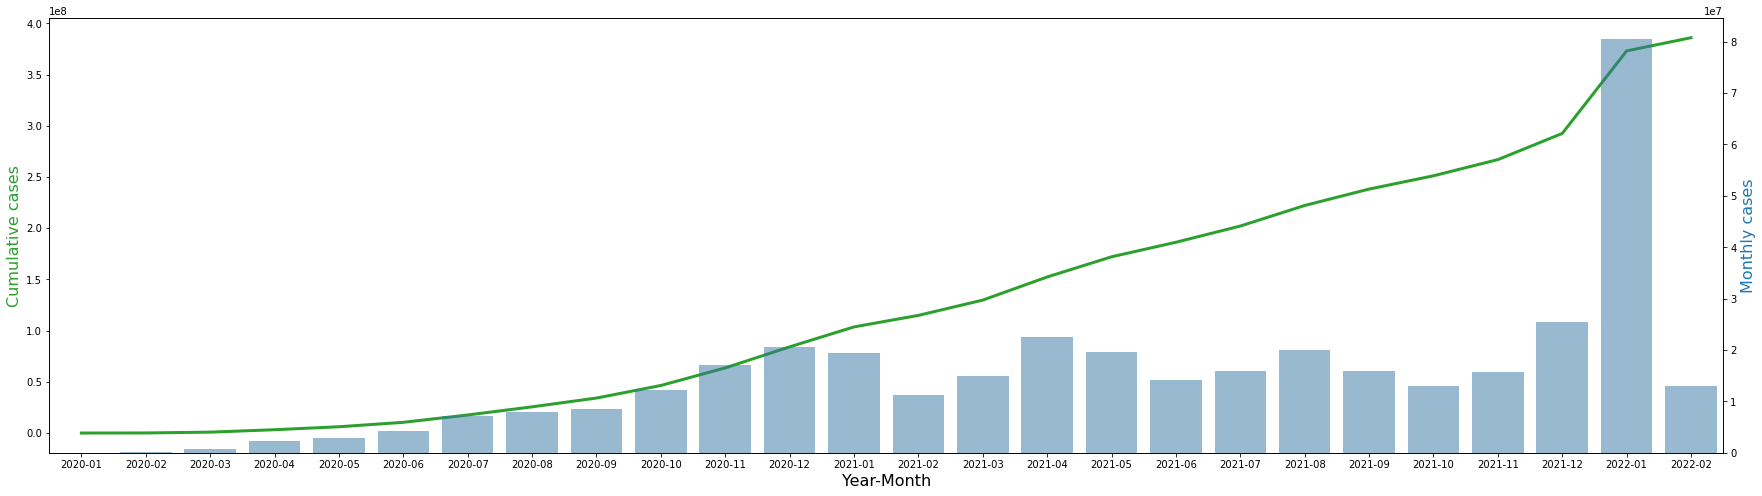

In [728]:
fig, ax1 = plt.subplots(figsize = (30, 8))

# cumulative line chart
color = "tab:green"
ax1 = sns.lineplot(x = "year_month", y = "cum_confirmed", color = color, linewidth = 3, \
                   data = df_confirmed_case_monthly)
ax1.set_xlabel("Year-Month", fontsize = 16)
ax1.set_ylabel("Cumulative cases", color = color, fontsize = 16)

# monthly bar chart
ax2 = ax1.twinx()
color = "tab:blue"
ax2 = sns.barplot(x = "year_month", y = "monthly_confirmed", color = color, alpha = 0.5, \
                  data = df_confirmed_case_monthly)
ax2.set_ylabel("Monthly cases", color = color, fontsize = 16)
plt.show()

The table and graph above show the total number of confirmed cases by monthly and cumulatively. In January 2020, there were a total of 9863 cases, and it steadily increased, and in February of 22, there were approximately 380 million cases. The number of monthly cases steadily increased and then remained at around 15 to 20 million, and then surged to 80 million per month in January 2022.

### <font color='#8B0000'>Q3 Use the country-level data set to create a histogram to:</font>
- Show the distribution of values for the number of hospitalizations per 1000 people.  
- Draw a red vertical line that shows the median value on the histogram.

In [729]:
df_hospitalization = df_covid_country_level[["date", "hosp", "population", "administrative_area_level_1"]].dropna()
df_hospitalization = df_hospitalization[df_hospitalization.hosp > 0]
df_hospitalization["hosp/pop"] = df_hospitalization.hosp / df_hospitalization.population * 1000

In [730]:
df_hospitalization["hosp/pop"].describe()

count    28379.000000
mean         0.306831
std          5.254355
min          0.000024
25%          0.029287
50%          0.088823
75%          0.235695
max        239.165329
Name: hosp/pop, dtype: float64

75% of the data are below 0.23, while the maximum is 239. In other words, we think that there is an outlier on the large value side.

In [731]:
df_hospitalization.sort_values("hosp/pop", ascending = False).head(10)

,date,hosp,population,administrative_area_level_1,hosp/pop
205,2020-05-07,149.0,623.0,Costa Atlantica,239.165329
203,2020-05-05,149.0,623.0,Costa Atlantica,239.165329
206,2020-05-08,149.0,623.0,Costa Atlantica,239.165329
204,2020-05-06,149.0,623.0,Costa Atlantica,239.165329
194,2020-04-26,148.0,623.0,Costa Atlantica,237.560193
195,2020-04-27,148.0,623.0,Costa Atlantica,237.560193
196,2020-04-28,148.0,623.0,Costa Atlantica,237.560193
197,2020-04-29,148.0,623.0,Costa Atlantica,237.560193
198,2020-04-30,148.0,623.0,Costa Atlantica,237.560193
199,2020-05-01,148.0,623.0,Costa Atlantica,237.560193


If you look at the cases where the number is abnormally large, you can see that it is a country called Costa Atlantica, and since the population is very small, 623, this large number comes out. Therefore, let's look at only data up to 99.5 quantiles.

In [732]:
percentile_99 = np.percentile(df_hospitalization["hosp/pop"], 99.5)
percentile_99

1.4660090896687556

The 99.5% percentile of the number of hospitalizations per 1000 people is about 1.47.

In [733]:
hospital_median = df_hospitalization["hosp/pop"].median()

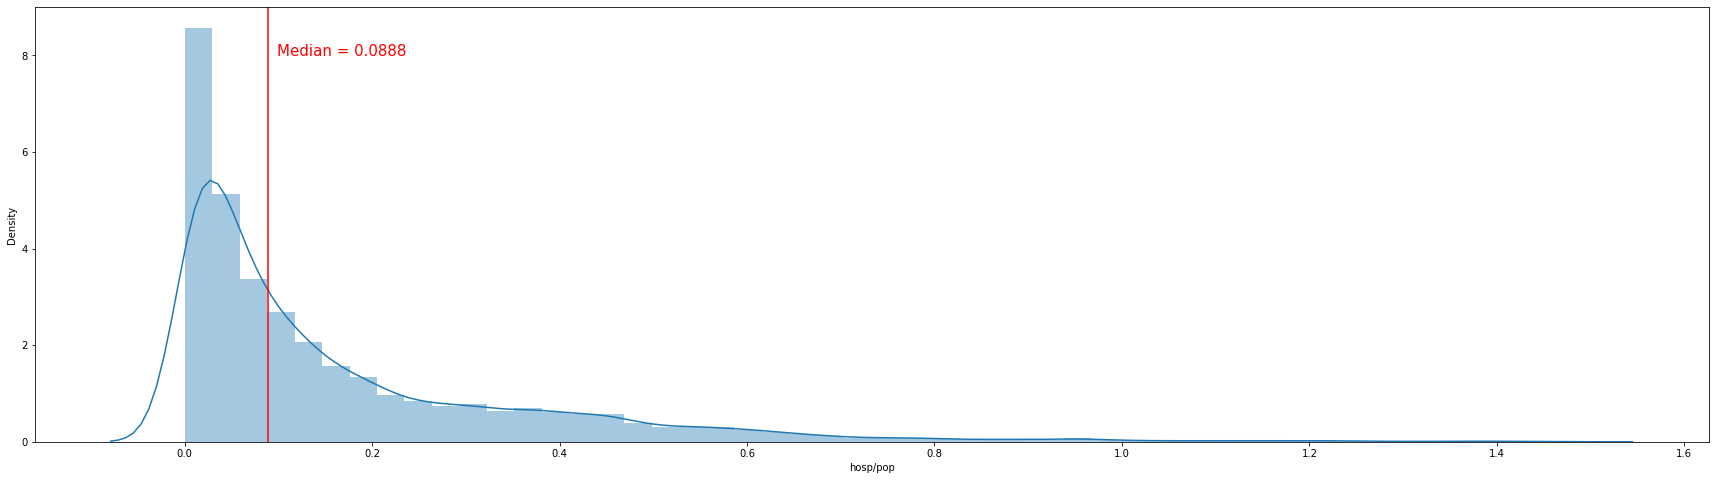

In [734]:
plt.figure(figsize = (30, 8))
sns.distplot(df_hospitalization[(df_hospitalization["hosp/pop"] <= percentile_99)]["hosp/pop"])
plt.axvline(x = hospital_median, color = "red")
plt.annotate(f'Median = {round(hospital_median, 4)}', xy=(hospital_median + 0.01, 8), fontsize = 15, color = "red")
plt.show()

The histogram above shows the distribution of the number of hospitalizations per 1000 population excluding values above 99.5 percentile. More than half show a figure of 0.1 per 1000 population. The median number of hospitalizations per 1000 people is about 0.088.

### <font color='#8B0000'> Q4 Create a visualization that shows the  number of tests per day in the United States and indicate the median value on your visualization.</font>

In [735]:
US = df_covid_country_level[df_covid_country_level.administrative_area_level_1 == "United States"].sort_values("date")

In [736]:
US_test = US[["date", "tests"]].rename(columns = {"tests" : "cum_tests"})

In [737]:
US_test["daily_tests"] = US_test.cum_tests.diff().fillna(US_test['cum_tests'])
US_test = US_test[["date", "daily_tests", "cum_tests"]].dropna()

In [738]:
US_test["daily_tests_moving_avg"] = US_test.daily_tests.rolling(7).mean()

In [739]:
US_test

,date,daily_tests,cum_tests,daily_tests_moving_avg
159337,2020-03-01,348.0,348.0,NaN
159338,2020-03-02,514.0,862.0,NaN
159339,2020-03-03,622.0,1484.0,NaN
159340,2020-03-04,887.0,2371.0,NaN
159341,2020-03-05,1201.0,3572.0,NaN
...,...,...,...,...
160035,2022-01-28,1725137.0,783594943.0,1.650536e+06
160036,2022-01-29,1121147.0,784716090.0,1.571547e+06
160037,2022-01-30,689304.0,785405394.0,1.514444e+06
160038,2022-01-31,1068185.0,786473579.0,1.460625e+06


In [740]:
us_daily_test_median = US_test.daily_tests.median()

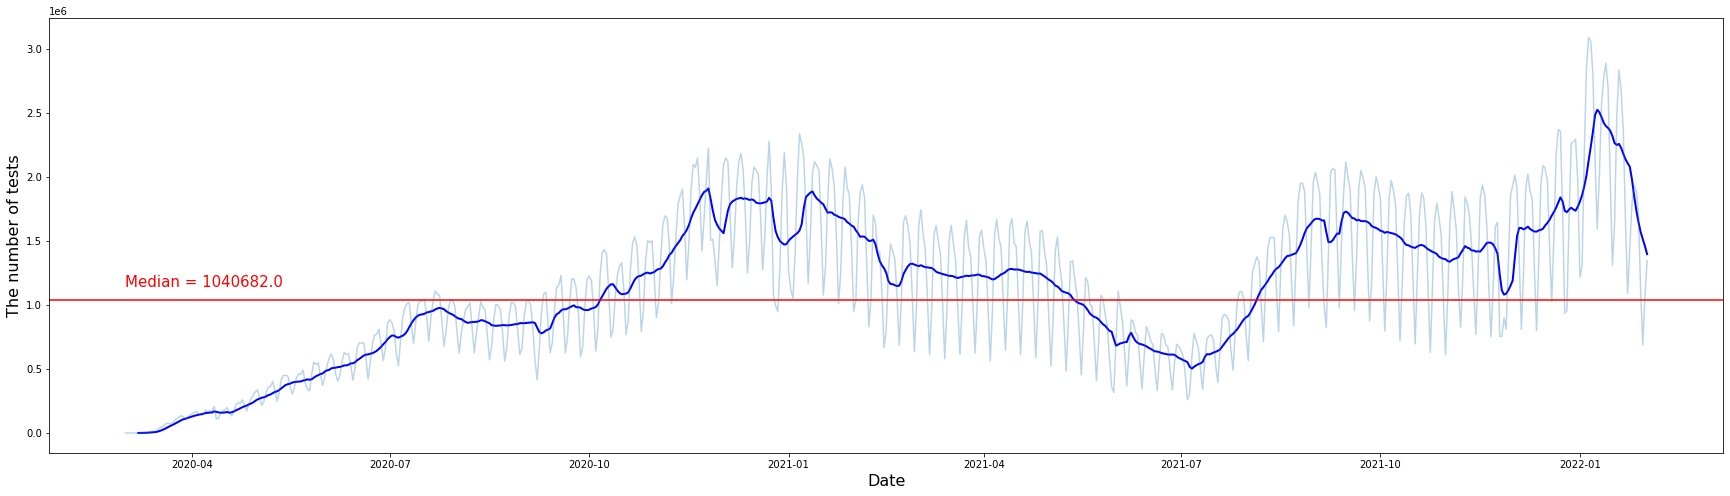

In [741]:
plt.figure(figsize = (30, 8))
sns.lineplot(x = "date", y = "daily_tests_moving_avg", color = "blue", linewidth = 2, \
             data = US_test)
sns.lineplot(x = "date", y = "daily_tests", color = "tab:blue", alpha = 0.3, \
             data = US_test)
plt.axhline(y = us_daily_test_median, color = "red")
plt.annotate(f'Median = {us_daily_test_median}', xy=(datestr2num("2020-03-01"), us_daily_test_median + 100000), fontsize = 15, color = "red")
plt.xlabel("Date", fontsize = 16)
plt.ylabel("The number of tests", fontsize = 16)
plt.show()

In the graph above, light blue is the number of tests per day, and dark blue is the smoothed graph of the light blue graph using the 7-day rolling average. We can check the overall trend by looking at the smoothed graph. It shows an increasing trend until January 2021 and then shows a decreasing trend until July 2021. And again, it shows an increasing trend from July 2021, then sharply increases on January 22, and has since decreased. The median number of tests per day in the United States is 1,040,682.

## For questions below:
- You will have to call the covid19() function again **with parameters specific to Canada**. 
- Set the parameter <code>level = 2</code> in the call to covid19().

In [742]:
canada,src = covid19("CAN",level = 2)

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [743]:
canada.tail()

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
496252,eef40c88,2022-02-04,6550.0,17.0,5581.0,39811.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
496253,eef40c88,2022-02-05,6550.0,17.0,5581.0,39852.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
496254,eef40c88,2022-02-06,6550.0,17.0,5581.0,39852.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
496255,eef40c88,2022-02-07,6846.0,17.0,5925.0,39878.0,97798.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
496256,eef40c88,2022-02-08,NaN,NaN,NaN,NaN,97798.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1


### <font color='#8B0000'> Q5 Create a bar plot to show the number of tests conducted in each province.  </font>
Order the provinces from west to east (use your best judgement for cases where the order is unclear).  Which Canadian province that has conducted the most tests?

In [744]:
canada.columns

Index(['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index',
       'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'population', 'iso_alpha_3', 'iso_alpha_2',
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility',
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_g

In [745]:
canada.administrative_area_level_2.unique()

array(['Prince Edward Island', 'Manitoba', 'Yukon', 'Nunavut', 'Ontario',
       'Quebec', 'Nova Scotia', 'British Columbia',
       'Newfoundland and Labrador', 'New Brunswick', 'Saskatchewan',
       'Alberta', 'Northwest Territories'], dtype=object)

In [746]:
canada_test_conducted = canada[["id", "date", "tests", "administrative_area_level_2", "latitude", "longitude", "population"]].rename(columns = {"administrative_area_level_2" : "province"})
canada_test_conducted.dropna(inplace = True)

In [747]:
canada_test_conducted.sort_values(["province","date"], ascending = [True, False])

,id,date,tests,province,latitude,longitude,population
475439,e61d6191,2022-02-07,6763655.0,Alberta,54.500614,-115.002842,4413146
475438,e61d6191,2022-02-06,6746196.0,Alberta,54.500614,-115.002842,4413146
475437,e61d6191,2022-02-05,6746196.0,Alberta,54.500614,-115.002842,4413146
475436,e61d6191,2022-02-04,6746196.0,Alberta,54.500614,-115.002842,4413146
475435,e61d6191,2022-02-03,6739970.0,Alberta,54.500614,-115.002842,4413146
...,...,...,...,...,...,...,...
124171,38791b01,2020-03-15,49.0,Yukon,64.819450,-136.804579,41078
124170,38791b01,2020-03-14,37.0,Yukon,64.819450,-136.804579,41078
124169,38791b01,2020-03-13,36.0,Yukon,64.819450,-136.804579,41078
124168,38791b01,2020-03-12,34.0,Yukon,64.819450,-136.804579,41078


In [748]:
canada_test_conducted["date_order"] = canada_test_conducted.sort_values(["province","date"], ascending = [True, False]).groupby("province").cumcount() + 1

In [749]:
canada_test_conducted[canada_test_conducted.date_order == 1].sort_values(["longitude", "latitude"])

,id,date,tests,province,latitude,longitude,population,date_order
124865,38791b01,2022-02-07,9129.0,Yukon,64.819450,-136.804579,41078,1
407259,c229681f,2022-02-07,5495428.0,British Columbia,54.499851,-124.993506,5110917,1
496255,eef40c88,2022-02-07,39878.0,Northwest Territories,65.280365,-121.562220,44904,1
475439,e61d6191,2022-02-07,6763655.0,Alberta,54.500614,-115.002842,4413146,1
474047,e4c07903,2022-02-07,1452358.0,Saskatchewan,54.500038,-105.927063,1181666,1
264912,7fc88543,2022-02-07,32179.0,Nunavut,66.001041,-100.263618,38780,1
99343,2a9fd65a,2022-02-07,1434252.0,Manitoba,54.510344,-97.212207,1377517,1
276313,83fc0fa9,2022-02-07,22606233.0,Ontario,49.269156,-87.166464,14711827,1
347935,a7ce33b9,2022-02-07,16015314.0,Quebec,53.889046,-73.288937,8537674,1
443254,d177e539,2022-02-07,704856.0,New Brunswick,46.551245,-66.411970,779993,1


Since the test column is a cumulative number, if you check the data of the last date in each province, you can check the number of tests conducted in each province. 

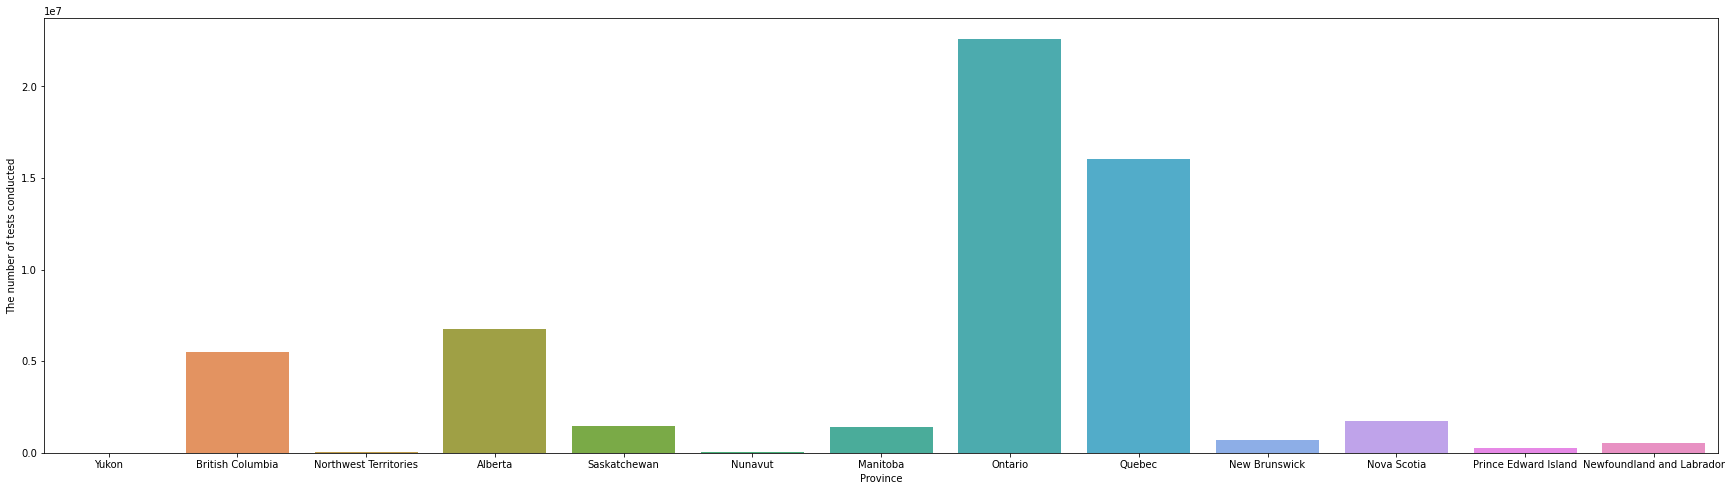

In [750]:
plt.figure(figsize = (30, 8))
sns.barplot(x = "province", y = "tests", \
            data = canada_test_conducted[canada_test_conducted.date_order == 1].sort_values(["longitude", "latitude"]))
plt.ylabel("The number of tests conducted")
plt.xlabel("Province")
plt.show()

In the above bar chart, provinces are sorted in the order from west to east by sorting longitude first, and then latitude values. Looking at the bar chart above, it can be seen that Ontario and Quebec tested overwhelmingly, and there were more tests in the west than in the east. However, since this is an interpretation that does not take into account the population of each province, it is necessary to consider the population as well.

### <font color='#8B0000'> Q6 Create a bar plot that shows the number of tests conducted per 1000 people for each province in Canada.</font>
How would you interpret the results of this bar plot given the results of bar plot in question 5. 

In [751]:
canada_test_conducted.loc[canada_test_conducted.date_order == 1, "tests/pop"] = canada_test_conducted[canada_test_conducted.date_order == 1].tests \
                                                                            / canada_test_conducted[canada_test_conducted.date_order == 1].population \
                                                                            * 1000

In [752]:
canada_test_conducted[canada_test_conducted.date_order == 1].sort_values(["longitude", "latitude"])

,id,date,tests,province,latitude,longitude,population,date_order,tests/pop
124865,38791b01,2022-02-07,9129.0,Yukon,64.819450,-136.804579,41078,1,222.235747
407259,c229681f,2022-02-07,5495428.0,British Columbia,54.499851,-124.993506,5110917,1,1075.233270
496255,eef40c88,2022-02-07,39878.0,Northwest Territories,65.280365,-121.562220,44904,1,888.072332
475439,e61d6191,2022-02-07,6763655.0,Alberta,54.500614,-115.002842,4413146,1,1532.615282
474047,e4c07903,2022-02-07,1452358.0,Saskatchewan,54.500038,-105.927063,1181666,1,1229.076575
264912,7fc88543,2022-02-07,32179.0,Nunavut,66.001041,-100.263618,38780,1,829.783394
99343,2a9fd65a,2022-02-07,1434252.0,Manitoba,54.510344,-97.212207,1377517,1,1041.186425
276313,83fc0fa9,2022-02-07,22606233.0,Ontario,49.269156,-87.166464,14711827,1,1536.602694
347935,a7ce33b9,2022-02-07,16015314.0,Quebec,53.889046,-73.288937,8537674,1,1875.840422
443254,d177e539,2022-02-07,704856.0,New Brunswick,46.551245,-66.411970,779993,1,903.669648


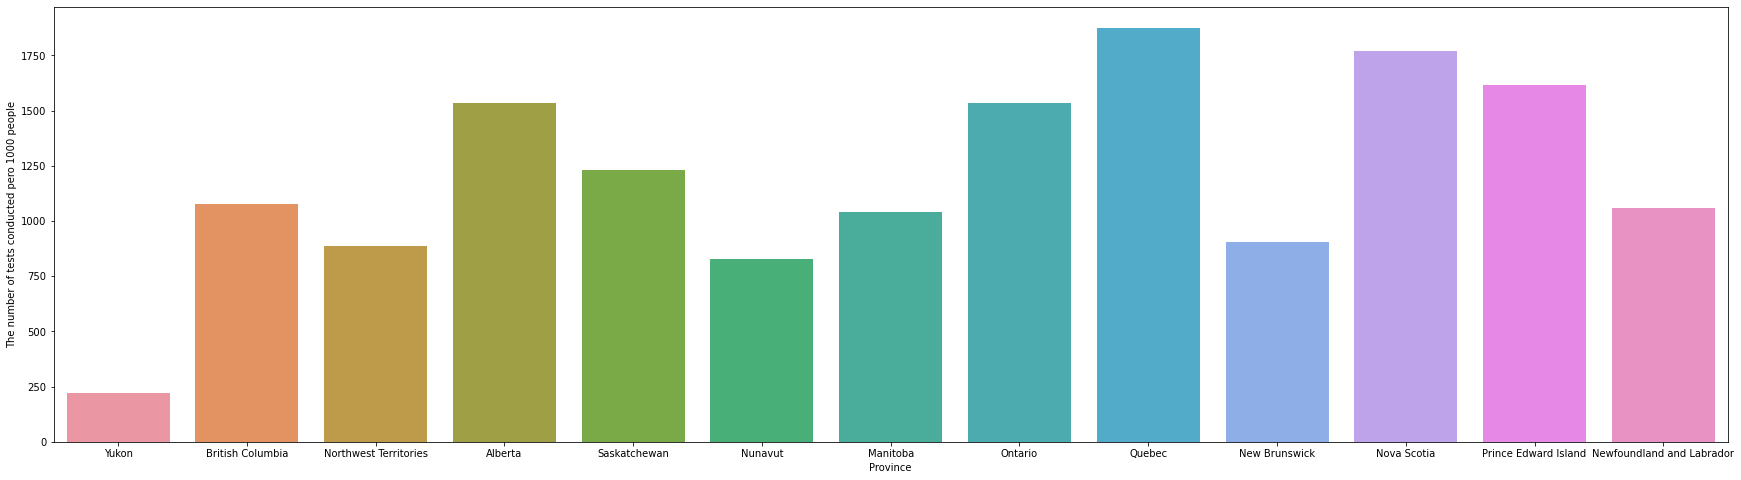

In [753]:
plt.figure(figsize = (30, 8))
sns.barplot(x = "province", y = "tests/pop", \
            data = canada_test_conducted[canada_test_conducted.date_order == 1].sort_values(["longitude", "latitude"]))
plt.ylabel("The number of tests conducted pero 1000 people")
plt.xlabel("Province")
plt.show()

In the graph in Q5, it came out that Ontario and Quebec had an overwhelming number of tests, but if you check the graph in Q6, you can confirm that this was because the population of the two provinces was overwhelmingly large. Comparing the number of tests per 1000 population, it can be seen that Ontario is lower than Nova Scotia and Prince Edward Island. In addition, it can be seen that the number of tests per 1000 population is slightly higher in the east than in the west.

### <font color='#8B0000'> Q7 Create a visualization that shows which Canadian province has the highest recovery rate. </font>
Recovery rate is calculated as the number of recovered cases divided by the number of confirmed cases.

In [754]:
canada_recovery = canada[["id", "date", "confirmed", "recovered", "administrative_area_level_2", "latitude", "longitude"]].rename(columns = {"administrative_area_level_2" : "province"})
canada_recovery.dropna(inplace = True)

In [755]:
canada_recovery["date_order"] = canada_recovery.sort_values(["province","date"], ascending = [True, False]).groupby("province").cumcount() + 1

In [756]:
canada_recovery.loc[canada_recovery.date_order == 1, "recovery_rate"] = canada_recovery[canada_recovery.date_order == 1].recovered \
                                                                            / canada_recovery[canada_recovery.date_order == 1].confirmed

In [757]:
canada_recovery.loc[canada_recovery.date_order == 1].sort_values("recovery_rate", ascending = False)

,id,date,confirmed,recovered,province,latitude,longitude,date_order,recovery_rate
124865,38791b01,2022-02-07,3235.0,3105.0,Yukon,64.819450,-136.804579,1,0.959815
276313,83fc0fa9,2022-02-07,1056149.0,1010878.0,Ontario,49.269156,-87.166464,1,0.957136
347935,a7ce33b9,2022-02-07,883192.0,834633.0,Quebec,53.889046,-73.288937,1,0.945019
475439,e61d6191,2022-02-07,508051.0,474284.0,Alberta,54.500614,-115.002842,1,0.933536
407259,c229681f,2022-02-07,333925.0,306419.0,British Columbia,54.499851,-124.993506,1,0.917628
474047,e4c07903,2022-02-07,123258.0,113023.0,Saskatchewan,54.500038,-105.927063,1,0.916963
441298,d07806cb,2022-02-07,18740.0,17156.0,Newfoundland and Labrador,49.120554,-56.692576,1,0.915475
390749,b91ff4d1,2022-02-07,40767.0,37300.0,Nova Scotia,44.727022,-64.602949,1,0.914956
443254,d177e539,2022-02-07,31017.0,27298.0,New Brunswick,46.551245,-66.411970,1,0.880098
496255,eef40c88,2022-02-07,6846.0,5925.0,Northwest Territories,65.280365,-121.562220,1,0.865469


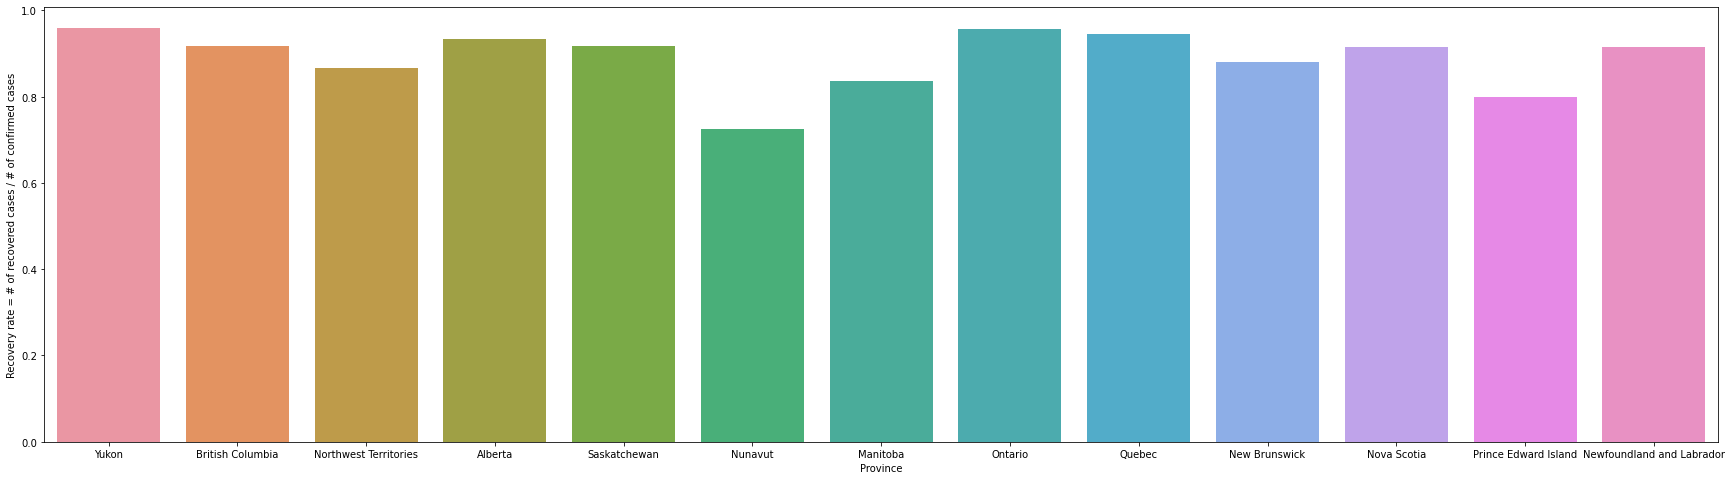

In [758]:
plt.figure(figsize = (30, 8))
sns.barplot(x = "province", y = "recovery_rate", \
            data = canada_recovery[canada_recovery.date_order == 1].sort_values(["longitude", "latitude"]))
plt.ylabel("Recovery rate = # of recovered cases / # of confirmed cases")
plt.xlabel("Province")
plt.show()

Yukon has the highest recovery rate of 0.96, Nunavut has the lowest 0.73. Yukon had the lowest number of tests per 1000 population but the highest recovery rate. In Nunavut, the number of tests per 1000 people was 829, which was much lower than in other provinces, but the recovery rate was also the lowest.

### <font color='#8B0000'> Q8 Create visualizations that show the impacts of _at least_ three policy measures on mortality or infection rates.</font>


See https://covid19datahub.io/articles/doc/data.html for descriptions of the available policy measures.  You are not limited to histograms and bar charts.  Remember that you can use subplots!


#### Gatherings restrictions

0 - no restrictions         
1 - restrictions on very large gatherings (the limit is above 1000 people)          
2 - restrictions on gatherings between 101-1000 people        
3 - restrictions on gatherings between 11-100 people           
4 - restrictions on gatherings of 10 people or less       

If gathering restrictions are targeted to a specific geographical region, then they have a negative value. Otherwise, if they are a general policy that is applied across the whole country/territory, then they have positive values. Since I am only interested in the impacts of the general policy on infection rates, I will focus on the data that have the positive gathering_restirctions values.

In [759]:
canada_gatherings_restriction = canada[["date", "confirmed", "population", "gatherings_restrictions", "administrative_area_level_2"]].rename(columns = {"administrative_area_level_2" : "province", "confirmed" : "cum_confirmed"})
canada_gatherings_restriction = canada_gatherings_restriction[canada_gatherings_restriction.cum_confirmed.isnull() == False]
canada_gatherings_restriction = canada_gatherings_restriction[canada_gatherings_restriction.gatherings_restrictions >= 0].sort_values(["province", "date"])
canada_gatherings_restriction["daily_confirmed"] = canada_gatherings_restriction.sort_values(["province", "date"]).groupby("province").cum_confirmed.diff().fillna(canada_gatherings_restriction.cum_confirmed)
canada_gatherings_restriction = canada_gatherings_restriction[canada_gatherings_restriction.daily_confirmed >= 0]
canada_gatherings_restriction = canada_gatherings_restriction[["date", "province", "population", "gatherings_restrictions", "daily_confirmed", "cum_confirmed"]]

In [760]:
canada_gatherings_restriction_infection_rate = canada_gatherings_restriction.groupby(["gatherings_restrictions", "date"]).sum()[["daily_confirmed", "population"]].reset_index() 
canada_gatherings_restriction_infection_rate["infection_rate"] = canada_gatherings_restriction_infection_rate.daily_confirmed / canada_gatherings_restriction_infection_rate.population * 100
canada_gatherings_restriction_infection_rate

,gatherings_restrictions,date,daily_confirmed,population,infection_rate
0,0.0,2020-01-31,4.0,19822744,0.000020
1,0.0,2020-02-08,3.0,19822744,0.000015
2,0.0,2020-02-16,1.0,19822744,0.000005
3,0.0,2020-02-21,1.0,19822744,0.000005
4,0.0,2020-02-24,1.0,19822744,0.000005
...,...,...,...,...,...
1854,4.0,2022-01-31,2073.0,4499128,0.046076
1855,4.0,2022-02-01,2188.0,4458050,0.049080
1856,4.0,2022-02-02,3172.0,4458050,0.071152
1857,4.0,2022-02-03,2512.0,4458050,0.056348


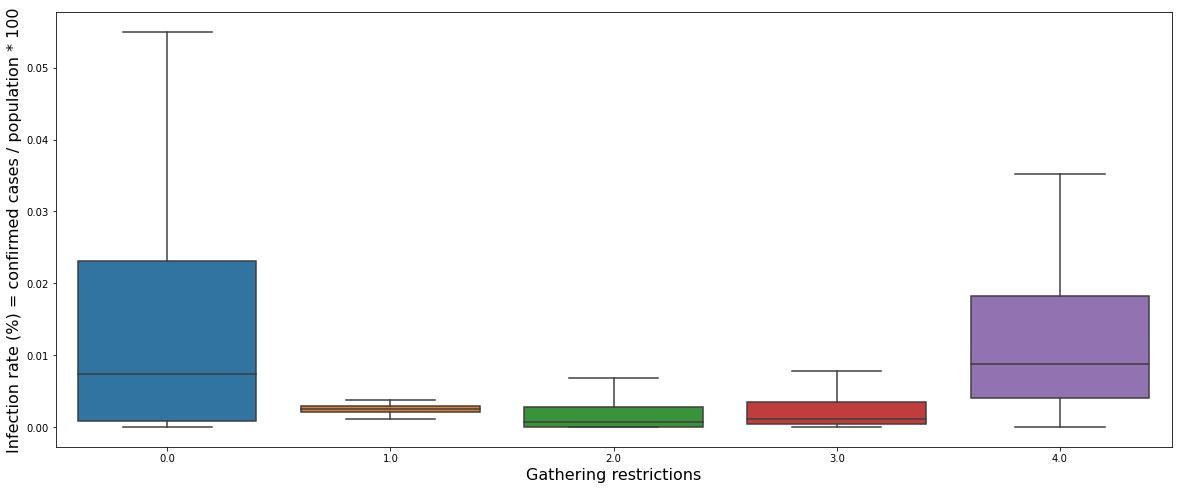

In [761]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = canada_gatherings_restriction_infection_rate, x = "gatherings_restrictions", y = "infection_rate", showfliers = False)
plt.xlabel("Gathering restrictions", fontsize = 16)
plt.ylabel("Infection rate (%) = confirmed cases / population * 100", fontsize = 16)
plt.show()

The graph above shows a box plot of the daily infection rate for each gathering restriction policy. It can be seen that the infection rate was high when there was no restriction, but when the restriction was level 1 to 3, the infection rate was significantly reduced. However, when the restriction was the highest at level 4, the infection rate was rather high.

In [762]:
canada_gatherings_restriction_infection_rate["infection_rate_moving_avg"] = canada_gatherings_restriction_infection_rate.sort_values(["gatherings_restrictions","date"]).groupby("gatherings_restrictions").infection_rate.rolling(7).mean().reset_index().infection_rate

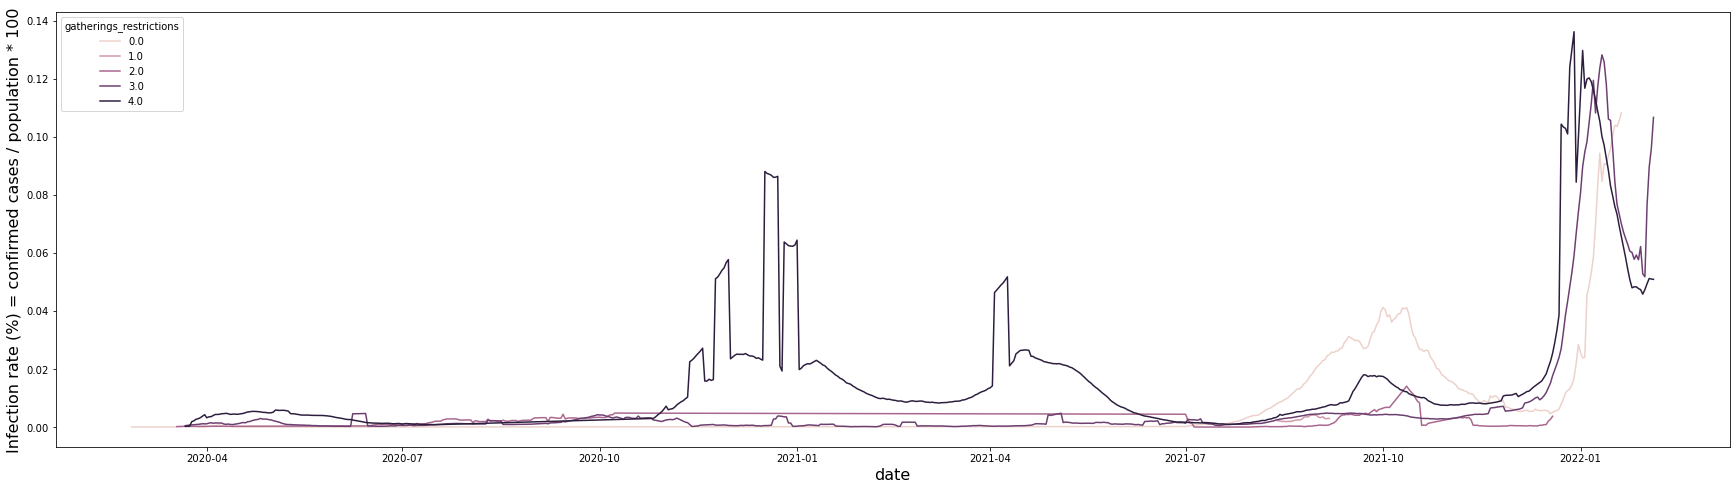

In [763]:
plt.figure(figsize = (30, 8))
sns.lineplot(data = canada_gatherings_restriction_infection_rate, x = "date", y = "infection_rate_moving_avg", hue = "gatherings_restrictions")
plt.xlabel("date", fontsize = 16)
plt.ylabel("Infection rate (%) = confirmed cases / population * 100", fontsize = 16)
plt.show()

It is a graph showing the infection rate for each restriction level over time. All five levels show a similar trend, but it can be seen that the infection rate is particularly high in the 4th level of restriction area from October 2020 to June 2021. In addition, the infection rate was particularly high in the level 0 restricted area from July 2021 to December 2021.

#### Stay home restrictions

0 - no measures         
1 - recommend not leaving house       
2 - require not leaving house with exceptions for daily exercise, grocery shopping, and ‘essential’ trips        
3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc)          

If stay-home restrictions are targeted to a specific geographical region, then they have a negative value. Otherwise, if they are a general policy that is applied across the whole country/territory, then they have positive values. Since I am only interested in the impacts of the general policy on infection rates, I will focus on the data that have positive stay-home restrictions values.

In [764]:
canada_stayhome_restriction = canada[["date", "confirmed", "population", "stay_home_restrictions", "administrative_area_level_2"]].rename(columns = {"administrative_area_level_2" : "province", "confirmed" : "cum_confirmed"})
canada_stayhome_restriction = canada_stayhome_restriction[canada_stayhome_restriction.cum_confirmed.isnull() == False]
canada_stayhome_restriction = canada_stayhome_restriction[canada_stayhome_restriction.stay_home_restrictions >= 0].sort_values(["province", "date"])
canada_stayhome_restriction["daily_confirmed"] = canada_stayhome_restriction.sort_values(["province", "date"]).groupby("province").cum_confirmed.diff().fillna(canada_stayhome_restriction.cum_confirmed)
canada_stayhome_restriction = canada_stayhome_restriction[canada_stayhome_restriction.daily_confirmed >= 0]
canada_stayhome_restriction = canada_stayhome_restriction[["date", "province", "population", "stay_home_restrictions", "daily_confirmed", "cum_confirmed"]]

In [765]:
canada_stayhome_restriction_infection_rate = canada_stayhome_restriction.groupby(["stay_home_restrictions", "date"]).sum()[["daily_confirmed", "population"]].reset_index() 
canada_stayhome_restriction_infection_rate["infection_rate"] = canada_stayhome_restriction_infection_rate.daily_confirmed / canada_stayhome_restriction_infection_rate.population * 100
canada_stayhome_restriction_infection_rate

,stay_home_restrictions,date,daily_confirmed,population,infection_rate
0,0.0,2020-01-31,4.0,19822744,0.000020
1,0.0,2020-02-08,3.0,19822744,0.000015
2,0.0,2020-02-16,1.0,19822744,0.000005
3,0.0,2020-02-21,1.0,19822744,0.000005
4,0.0,2020-02-24,1.0,19822744,0.000005
...,...,...,...,...,...
1389,2.0,2022-01-12,8351.0,8537674,0.097814
1390,2.0,2022-01-13,8793.0,8537674,0.102991
1391,2.0,2022-01-14,7382.0,8537674,0.086464
1392,2.0,2022-01-15,6705.0,8537674,0.078534


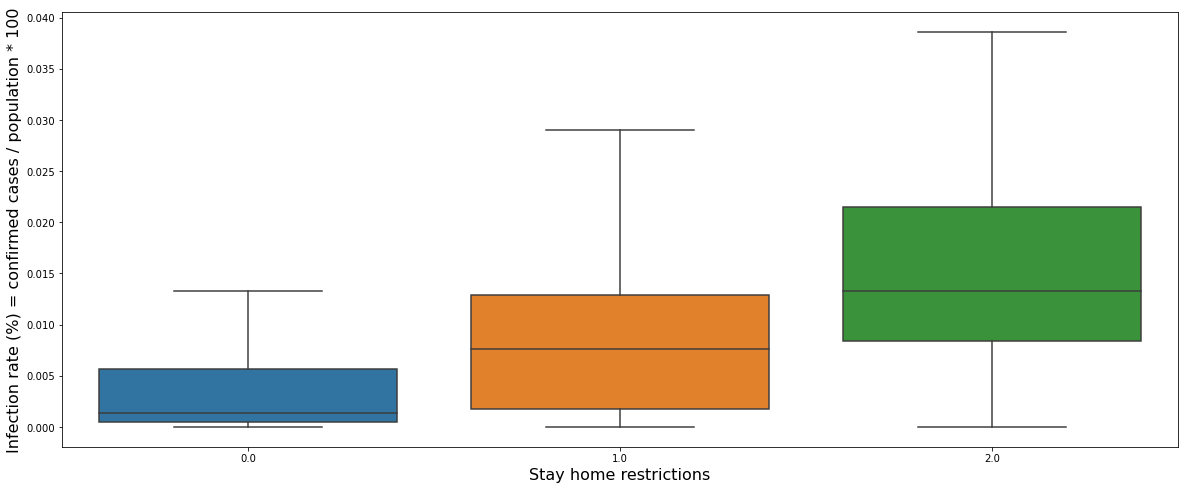

In [766]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = canada_stayhome_restriction_infection_rate, x = "stay_home_restrictions", y = "infection_rate", showfliers = False)
plt.xlabel("Stay home restrictions", fontsize = 16)
plt.ylabel("Infection rate (%) = confirmed cases / population * 100", fontsize = 16)
plt.show()

The graph above shows a box plot of the daily infection rate for each stay-home restriction. Contrary to our common sense, it can be seen that the higher the restriction level, the higher the infection rate.

In [767]:
canada_stayhome_restriction_infection_rate["infection_rate_moving_avg"] = canada_stayhome_restriction_infection_rate.sort_values(["stay_home_restrictions","date"]).groupby("stay_home_restrictions").infection_rate.rolling(7).mean().reset_index().infection_rate

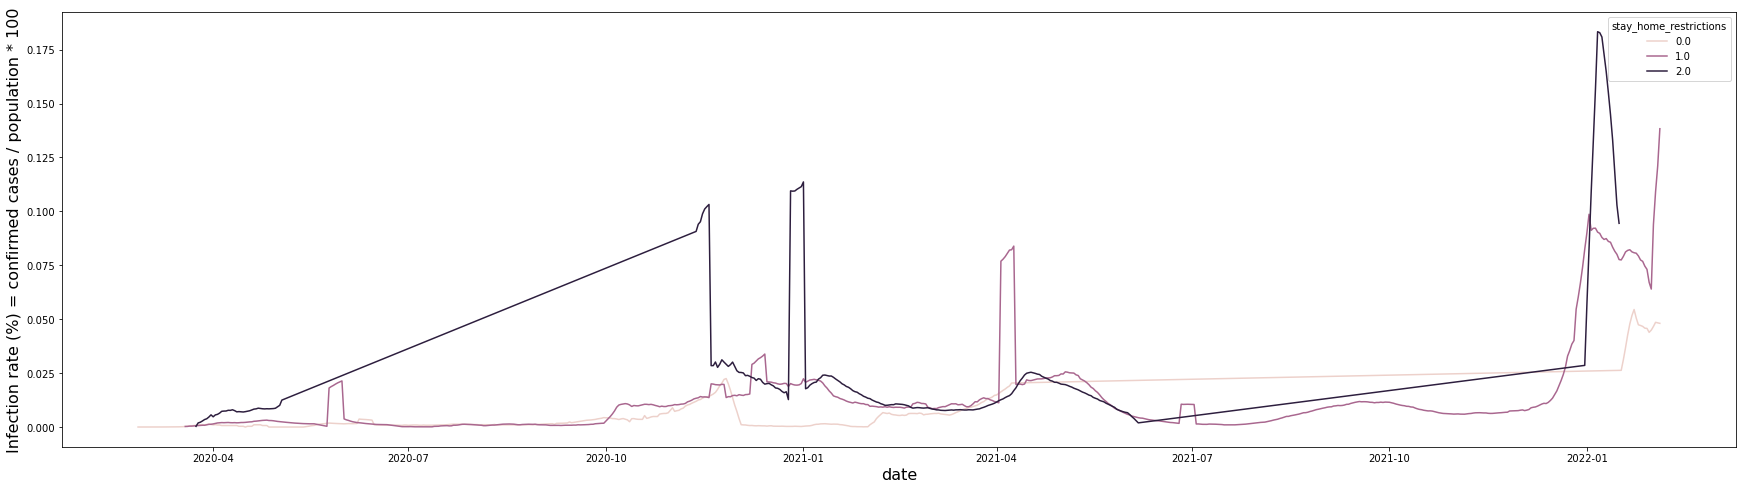

In [768]:
plt.figure(figsize = (30, 8))
sns.lineplot(data = canada_stayhome_restriction_infection_rate, x = "date", y = "infection_rate_moving_avg", hue = "stay_home_restrictions")
plt.xlabel("date", fontsize = 16)
plt.ylabel("Infection rate (%) = confirmed cases / population * 100", fontsize = 16)
plt.show()

The overall trend is similar, but in the case of the second-stage restriction, it can be seen that the infection rate was particularly high from April 2020 to January 2021.

#### Transport closing

0 - no measures           
1 - recommend closing (or significantly reduce volume/route/means of transport available)          
2 - require closing (or prohibit most citizens from using it)         

If transport closing restrictions are targeted to a specific geographical region, then they have a negative value. Otherwise, if they are a general policy that is applied across the whole country/territory, then they have positive values. Since I am only interested in the impacts of the general policy on infection rates, I will focus on the data that have positive transport closing values.

In [769]:
canada_transport_closing = canada[["date", "confirmed", "population", "transport_closing", "administrative_area_level_2"]].rename(columns = {"administrative_area_level_2" : "province", "confirmed" : "cum_confirmed"})
canada_transport_closing = canada_transport_closing[canada_transport_closing.cum_confirmed.isnull() == False]
canada_transport_closing = canada_transport_closing[canada_transport_closing.transport_closing >= 0].sort_values(["province", "date"])
canada_transport_closing["daily_confirmed"] = canada_transport_closing.sort_values(["province", "date"]).groupby("province").cum_confirmed.diff().fillna(canada_transport_closing.cum_confirmed)
canada_transport_closing = canada_transport_closing[canada_transport_closing.daily_confirmed >= 0]
canada_transport_closing = canada_transport_closing[["date", "province", "population", "transport_closing", "daily_confirmed", "cum_confirmed"]]

In [770]:
canada_transport_closing_infection_rate = canada_transport_closing.groupby(["transport_closing", "date"]).sum()[["daily_confirmed", "population"]].reset_index() 
canada_transport_closing_infection_rate["infection_rate"] = canada_transport_closing_infection_rate.daily_confirmed / canada_transport_closing_infection_rate.population * 100
canada_transport_closing_infection_rate

,transport_closing,date,daily_confirmed,population,infection_rate
0,0.0,2020-01-31,4.0,19822744,0.000020
1,0.0,2020-02-08,3.0,19822744,0.000015
2,0.0,2020-02-16,1.0,19822744,0.000005
3,0.0,2020-02-21,1.0,19822744,0.000005
4,0.0,2020-02-24,1.0,19822744,0.000005
...,...,...,...,...,...
1256,1.0,2022-01-27,378.0,521365,0.072502
1257,1.0,2022-01-28,265.0,521365,0.050828
1258,1.0,2022-01-29,208.0,521365,0.039895
1259,1.0,2022-01-30,210.0,521365,0.040279


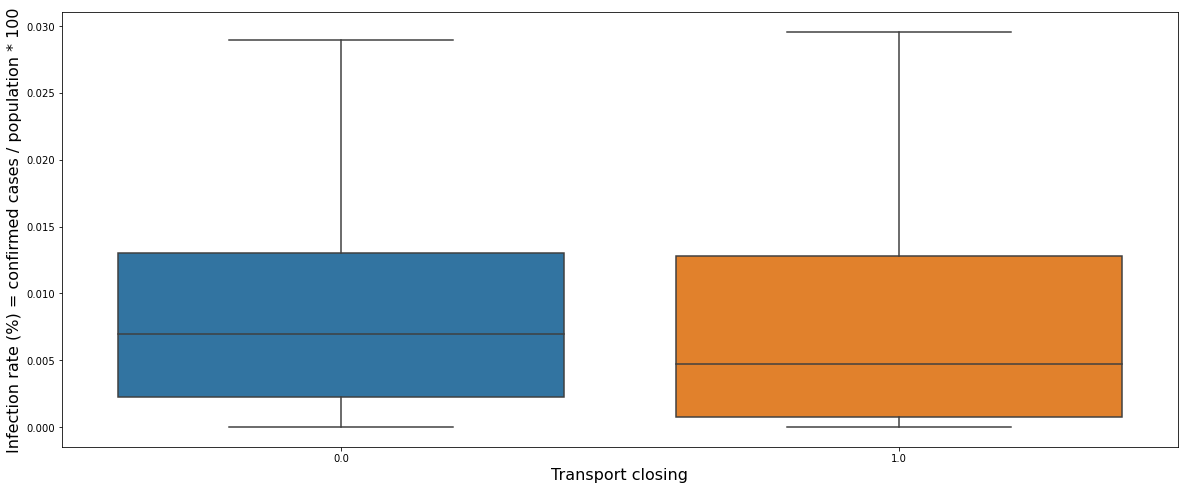

In [771]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = canada_transport_closing_infection_rate, x = "transport_closing", y = "infection_rate", showfliers = False)
plt.xlabel("Transport closing", fontsize = 16)
plt.ylabel("Infection rate (%) = confirmed cases / population * 100", fontsize = 16)
plt.show()

The graph above shows a box plot of the daily infection rate for each transport closing restriction. There was no level 2 restriction in Canada. It can be seen that the first level restriction, which only recommends transport closing, has little effect on the infection rate. 

In [772]:
canada_transport_closing_infection_rate["infection_rate_moving_avg"] = canada_transport_closing_infection_rate.sort_values(["transport_closing","date"]).groupby("transport_closing").infection_rate.rolling(7).mean().reset_index().infection_rate

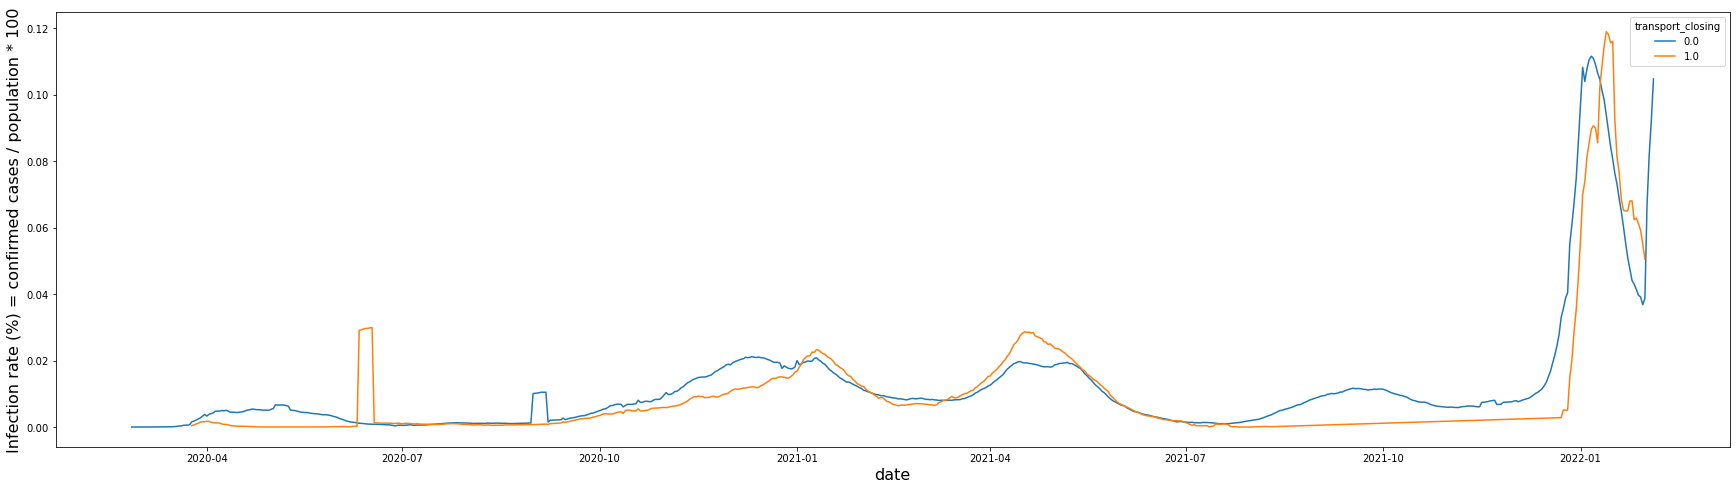

In [773]:
plt.figure(figsize = (30, 8))
sns.lineplot(data = canada_transport_closing_infection_rate, x = "date", y = "infection_rate_moving_avg", hue = "transport_closing")
plt.xlabel("date", fontsize = 16)
plt.ylabel("Infection rate (%) = confirmed cases / population * 100", fontsize = 16)
plt.show()

Level 0 and Level 1 restrictions show almost no difference in the infection rate over time.

## <font color='green'> Please submit your completed notebook in .IPYNB and .HTML formats via Canvas </font>

In [774]:
# process to get daily population for each province

# canada_compact_date = pd.DataFrame(canada.date.unique()).rename(columns = {0 : "date"})
# canada_compact_date["key"] = 1

# canada_compact_province = pd.DataFrame(canada.administrative_area_level_2.unique()).rename(columns = {0 : "province"})
# canada_compact_province["key"] = 1

# canada_compact_date_province = canada_compact_date.merge(canada_compact_province, on = "key", how = "outer").drop("key", axis = 1)

# canada_compact_date_province = canada_compact_date_province.merge(canada[["date", "administrative_area_level_2", "population"]] \
#                                                                       .rename(columns = {"administrative_area_level_2" : "province"}), on = ["date", "province"], how = "left")
# canada_compact_date_province = canada_compact_date_province.sort_values(["province", "date"])
# canada_compact_date_province['population'] = canada_compact_date_province.sort_values(["province", "date"]).groupby('province')['population'].transform(lambda v: v.ffill().bfill())
# canada_compact_date_province